# Import Necessary Libraries 

In [4]:
# import Basic libraries for Dataset Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 2.9 MB/s eta 0:00:04
    --------------------------------------- 0.3/10.6 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.6 MB 2.7 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.6 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.6 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/10.6 MB 2.7 MB/s eta 0:00:04
   ---- ----------------

In [13]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 770.8 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# EDA

In [8]:
# data set open using Pandas libraries 
dataset = pd.read_csv("C:\\Users\\DELL\\VISHNU_AM\\GitHub\\Data-set\\Email-Spam-Detection.csv")
# Dataset will show First 10 rows usine head() 
dataset.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
# This Method prints the information or summary of the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
#  used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
# Numerical Values
dataset.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
# #calculate descriptive statistics for categorical variables only
dataset.describe(include='object')

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
# To count all messages in the dataset
count_message=dataset.value_counts()
count_message.head(3)

Category  Message                                            
ham       Sorry, I'll call later                                 30
          I cant pick the phone right now. Pls send a message    12
          Ok...                                                  10
Name: count, dtype: int64

In [130]:
# count Total not spam in the dataset
def total_not_spam():
    ham_values=dataset['Category']=='ham'
    ham_count=ham_values.value_counts()
    print(ham_count)
total_not_spam()


Category
True     4825
False     747
Name: count, dtype: int64


In [38]:
# spam message count 
spam_data = dataset[dataset['Category'] == 'spam']
# To check null Values into spam_data
spam_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [39]:
# Not spam message count 
Not_spam_data = dataset[dataset['Category'] == 'ham']
# To check null Values into spam_data
Not_spam_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# No nall values inthe Data set------------------------------

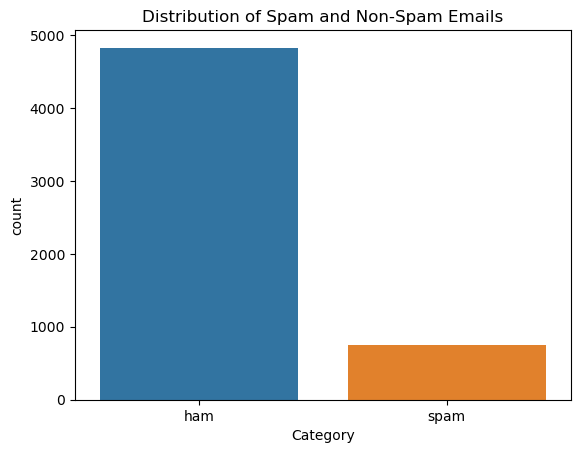

In [10]:
# graphical representation 
sn.countplot(x='Category', data=dataset)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

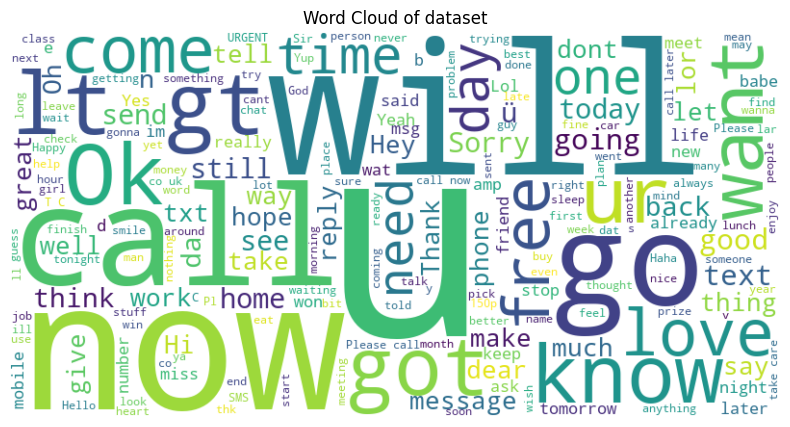

In [40]:
from wordcloud import WordCloud
words = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dataset['Message']))
plt.figure(figsize=(10, 5))
plt.imshow(words, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of dataset')
plt.show()

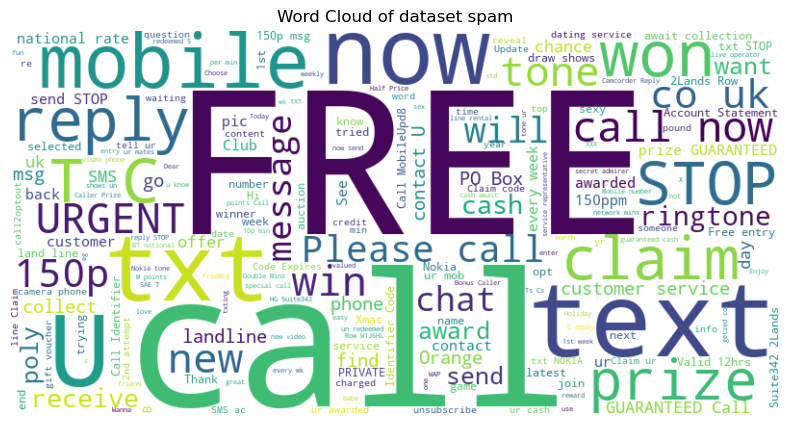

In [17]:
# To filtering Spam message data into word cloud
spam = dataset[dataset['Category'] == 'spam']
spamdata = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam['Message']))

plt.figure(figsize=(10, 5))
plt.imshow(spamdata, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of dataset spam')
plt.show()

**After analysing the data, we will need to :**
1. replace the 'category' column with numeric values
2. use countVectorizer to represent each data as a vector of numbers

# Data Preprocessing

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Category_1'] = label_encoder.fit_transform(dataset['Category'])

In [20]:
dataset

,Category,Message,Category_1
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [146]:
#droping the category column mistake to create new coln that col will delete
dataset.drop('Category_1',inplace =True, axis =1)

In [21]:
dataset['spam'] = dataset['Category'].apply(lambda x: 1 if x=='spam' else 0)
dataset.head()

,Category,Message,Category_1,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [22]:
dataset['spam']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: int64

## Train Test Split

In [132]:
x= dataset["Message"]
y= dataset["Category"]


In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [25]:
# plt.plot(x_train)
# dataset['Category_msg'] = label_encoder.fit_transform(dataset['Message'])

# Building The Model

In [134]:
clf = Pipeline([('vectorizer', CountVectorizer()),('nb', MultinomialNB())])

In [135]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

## The Model Accuracy

In [136]:
clf.score(x_train,y_train)

0.9946156147173197

In [29]:
clf.score(x_test,y_test)

0.9865410497981157

In [137]:
testing_emails = ["don't miss this chance to win 100$ dollars"]

In [138]:
da=clf.predict(testing_emails)
da

array(['spam'], dtype='<U4')

In [139]:
replacement_value = 'spam_mail'

modified_predictions = [replacement_value if pred == 1 else pred for pred in da]
modified_predictions

['spam']

In [33]:
import joblib

# Assuming clf is your trained classifier and vectorizer is your text vectorizer
joblib.dump(clf,'spam-emails-detection-using-naive-bayes-99.joblib')
# joblib.dump(vectorizer, 'spam-emails-detection-using-naive-bayes-99.joblib')


['spam-emails-detection-using-naive-bayes-99.joblib']